1. Are we all equal when it comes to lung cancer?

2. What are the external factors that increase the likelihood of developing lung cancer?

3. Can we predict whether or not someone will develop lung cancer?

In [1]:
#Basic imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load in lung cancer datasets
data = pd.read_csv("lung_cancer_data.csv")

# 0. Data cleaning

In [3]:
data.shape

(309, 16)

In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data['LUNG_CANCER'].value_counts()

#We note that the set is very unbalaned, this will have to be fixed during our sampling of the data for the model

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [6]:
#There is no missing data, the database must have been cleaned
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

It appears that apart from age, all the data is categorical. Indeed, apart from GENDER and LUNG_CANCER, all the columns have a value of 2 if the answer is YES and 1 if the answer is NO. For the purpose of clarity, we will change this into the standard:

1 == YES,

0 == NO.

Moreover, we will get dummy variables for GENDER and LUNG_CANCER to allow us to build a correlation matrix later on and see what features are the most important.

In [9]:
data_no_cat = data.copy()

#Clean so 1 is YES and 0 is NO.
#First replace all 1s by 0s (ok as AGE has min values>>1)
data_no_cat.replace({1:0},inplace=True)

#Now replace all 2s by 1s
data_no_cat.replace({2:1},inplace=True)

#Now create dummy variable for GENDER and LUNG_CANCER
data_no_cat=pd.get_dummies(data_no_cat,drop_first=True)

In [12]:
#Check changes have been correctly applied
data_no_cat.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M,LUNG_CANCER_YES
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0


# 1. Are we all equal facing cancer?

In this section, we won't consider aggravating factors such as smoking and alcohol. However, we will consider the factors beyond our control that may or may not play a role in lung cancer. Looking at the different features available in our dataset, 2 stand out:

1) Gender. Can our gender play against us?


2) Age. Are older people at risk?

In [13]:
data_no_cat.columns

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_M', 'LUNG_CANCER_YES'],
      dtype='object')

# I. Gender

Does gender affect our likelihood of contracting lung cancer?

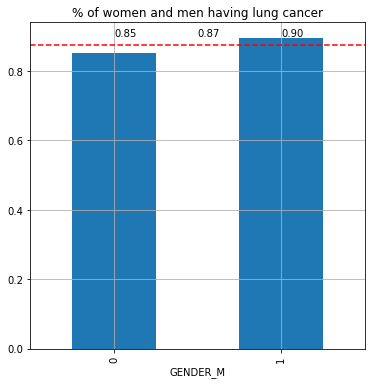

In [16]:
#People with cancer
avg_gender = data_no_cat.groupby(['GENDER_M'])['LUNG_CANCER_YES'].value_counts(normalize=True)[:,1]
fig=avg_gender.plot(kind='bar', figsize=(6,6))

plt.text(0,avg_gender[1]+0.005, "{:.2f}".format(avg_gender[0]))
plt.text(1,avg_gender[1]+0.005, "{:.2f}".format(avg_gender[1]))
fig.set_title("% of women and men having lung cancer")

plt.hlines(y=data_no_cat['LUNG_CANCER_YES'].value_counts(normalize=True)[1], xmin=-0.5, xmax= 1.5, linestyles= 'dashed',
          colors='r')
plt.text(0.5, avg_gender[1]+0.005,
         "{:.2f}".format(data_no_cat['LUNG_CANCER_YES'].value_counts(normalize=True)[1]))

plt.grid()
plt.show();

We observe that 90% of the men in this sample had lung cancer as opposed to 85% of women. Compared to the average of 87% of people having lung cancer in our dataset, it can be deduced that gender does play a small role in lung cancer.

Men are indeed slightly at a disatdvange when it comes to this kind of cancer. We are not fully equal.

Let's now explore another feature that affects us all: age.

# II. Age

Does age affect our chances of getting cancer?

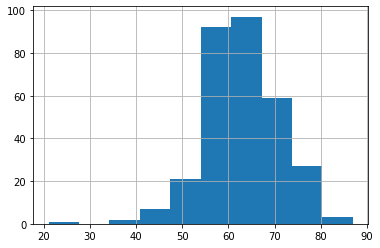

In [17]:
data.AGE.hist(bins=10);

Our dataset clearly has the majority of people between the age of approximately 55 and 75. This might be because this is the population at risk, that needs to be screened.

Due to this, studying the effect of age on cancer will be difficult since there is already a bias in our dataset with only older populations. Regardless, within that age range, we should be able to identify the effect of age on cancer

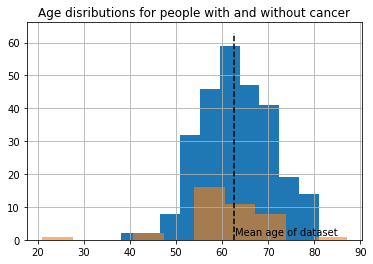

In [18]:
data[data.LUNG_CANCER == 'YES'].AGE.hist(bins=10)
data[data.LUNG_CANCER == 'NO'].AGE.hist(bins=10, alpha=0.6)
plt.vlines(data.AGE.mean(), 0, 63, linestyles = 'dashed', colors='k')
plt.text(data.AGE.mean()+0.2, 1.5, 'Mean age of dataset')
plt.title('Age disributions for people with and without cancer');

In [19]:
print('mean age with cancer: ', data[data.LUNG_CANCER == 'YES'].AGE.mean())
print('mean age without cancer: ', data[data.LUNG_CANCER == 'NO'].AGE.mean())

mean age with cancer:  62.95185185185185
mean age without cancer:  60.743589743589745


We note that in our dataset, the age distributions of people with cancer (blue) is approximaltely symmetric, with a mean age of 62.95. If we compare this distribution to the overall distribution, we can observe a more clear peak at which chances of getting cancer are the highest.

In contrast, because of the smaller number of people without cancer in this dataset, a trend isn't as clear. However, we can observe that on average, these people are slightly younger with an average age of 60.74. Nevertheless, the relation between age and cancer isn't linear (due to life expectancy as well as the dataset's age distribution).

Overall, we can conclude that age is likely a factor that increases the likelihood of having cancer. Nevertheless, because our dataset doesn't cover a large range of people, it is hard to tell to what extent this is true.

# III. Age and Gender

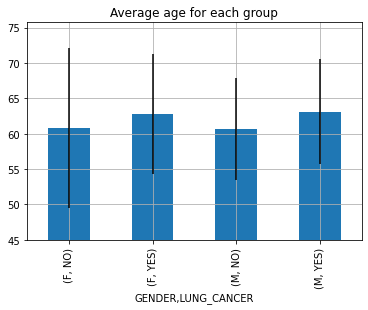

In [115]:
std_gender_vs_age =data.groupby(['GENDER', 'LUNG_CANCER']).std().AGE
avg_gender_vs_age = data.groupby(['GENDER', 'LUNG_CANCER']).mean().AGE

fig=avg_gender_vs_age.plot(kind='bar', yerr=std_gender_vs_age)
fig.set_title("Average age for each group")
fig.set_ylim(45)
plt.grid()
plt.show()

In [20]:
data.groupby('GENDER').mean().AGE

GENDER
F    62.489796
M    62.839506
Name: AGE, dtype: float64

The above bar plot shows that on average, people with cancer are indeed slightly older. However, the standard errors plotted suggest that it is satistically insufficient to make strong conclusions about this.

Let's now see if age and gender relate to cancer together. Recall that in I., we suggested men were more prone to cancer. Now, because we said that older people are also more at risk, we might wonder if men appear to be more at risk due to an inbalance in our dataset with more older men than women in our dataset. This hypothesis can immediately be refuted when considering the average age of men and women which is very similar in our dataset.

## IV. Expanding:
### Are we really born unequal, or are our behaviours the leading factors to lung cancer?

Although we hypothesized that older men were more at risk of lung cancer, does this truly make them unequal to younger women? So far, we have only explored age and gender as independent physical 'traits'. However, men and women are socialized differently. Men for instance, are usually more prone to risk. These behavioural differences might imply that men are likelier to smoke or drink, which in turn could increase their risk of lung cancer.

In the following notebook, we will explore the links between gender and social behaviours like smoking and drinking. This will help us establish in more detail what factors are truly increasing lung cancer risk.